<a href="https://colab.research.google.com/github/Shashankshekharpandey/yes-bank-stock-closing-price-predictionn/blob/main/yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Loading the dataset
dataset = pd.read_csv("data_YesBank_StockPrices.csv")

In [ ]:
#printing the first five rows 
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#lets see the information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
#descriptive statistics knowledge about dataset
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
#checking null values

dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
#Changing Date object to datetime
dataset['Date']=pd.to_datetime(dataset.Date, errors = 'coerce')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    0 non-null      datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [ ]:
#checking shape of data
dataset.shape

(185, 5)

In [ ]:
#checking length of data
len(dataset)

185

<AxesSubplot:>

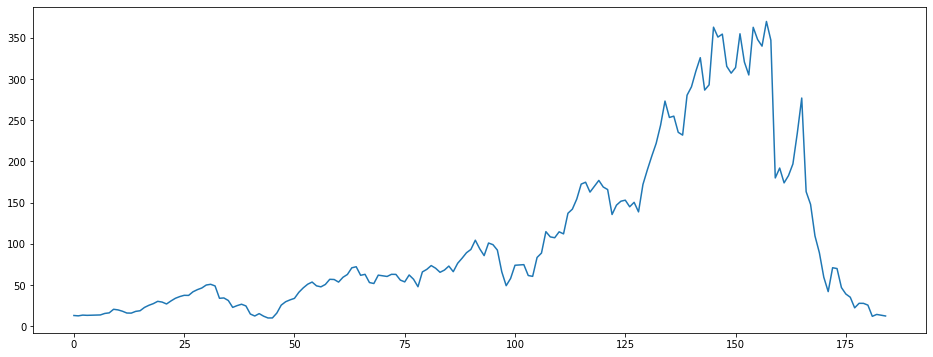

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
X = dataset[['Open','High','Low']]
y= dataset['Close']

In [ ]:
#importing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [ ]:
X_train.shape

(138, 3)

In [ ]:
X_test.shape

(47, 3)

In [ ]:
#importing Linear regression and dependencieds from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[-0.44864858  0.47263345  1.01280757]


In [ ]:
print(regressor.intercept_)

1.454332730796608


In [ ]:
#predict the data
predicted = regressor.predict(X_test)

In [ ]:
print(X_test)

       Open    High     Low
33    33.90   35.80   28.51
125  153.00  154.52  133.71
173   70.00   70.50   40.70
112  137.10  143.91  132.44
61    59.40   68.88   59.01
18    27.40   34.16   27.00
137  235.40  245.00  218.25
7     15.50   16.97   15.40
5     13.49   14.44   13.00
162  182.85  236.30  181.15
152  320.70  325.80  285.10
168  109.60  110.60   81.75
124  151.73  157.96  144.03
71    60.40   63.39   54.80
155  348.00  350.10  327.35
164  234.60  281.30  228.80
63    70.90   76.00   68.21
37    25.00   28.98   24.62
138  231.98  284.31  226.30
54    53.60   57.58   46.42
44    10.00   11.24    8.16
110  114.60  126.85  107.18
166  163.30  178.05  133.05
60    53.55   60.94   53.02
131  206.40  223.00  201.14
171   42.00   76.65   29.05
134  273.30  290.00  231.20
4     13.35   13.88   12.88
108  108.43  114.46  100.44
66    62.98   63.54   49.39
157  369.95  404.00  338.00
144  293.04  372.00  290.78
86    66.20   77.69   64.46
116  174.80  182.00  156.80
26    37.40   41.75 

In [ ]:
dframe = pd.DataFrame(y_test,predicted)

In [ ]:
dfr = pd.DataFrame({'Actual price' : y_test,'Predicted Price' : predicted})

In [ ]:
print(dfr)

     Actual price  Predicted Price
33          34.06        32.040567
125        145.23       141.264921
173         46.95        44.590858
112        142.08       142.097527
61          62.22        67.125374
18          30.16        32.652325
137        231.26       232.682904
7           16.12        18.118106
5           13.71        15.393389
162        194.30       214.572315
152        304.90       300.308149
168         91.30        87.352727
124        153.30       153.912738
71          62.38        59.818048
155        339.60       342.336156
164        275.05       260.883537
63          71.86        74.648895
37          26.83        28.870358
138        279.10       260.949604
54          49.84        51.635530
44           9.98        10.544757
110        111.70       118.545474
166        147.95       147.096453
60          58.99        59.930541
131        221.30       217.966640
171         70.45        48.260506
134        250.85       250.063486
4           13.41   

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
regressor.score(X_test,y_test)

0.9933066400922782

In [ ]:
!pip install Prophet --user

  Using cached prophet-1.1.1-cp38-cp38-win_amd64.whl (12.1 MB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Using cached cmdstanpy-1.0.8-py3-none-any.whl (81 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

  Using cached ephem-4.1.3-cp38-cp38-win_amd64.whl (1.4 MB)




We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

cmdstanpy 1.0.8 requires numpy>=1.21, but you'll have numpy 1.19.2 which is incompatible.


Now we are using Fbprophet for the stock price closing prediction 

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
import plotly.io as pio
pio.renderers.default='colab'


In [ ]:
 px.area(df,x="Date",y="Close")